## Gromadzenie i eksploracja danych 2 - Grupowanie -
### Małgorzata Honc, 38663

#### Wczytaj zbiór iris, a następnie wykonaj poniższe polecenia.

Zbiór danych Iris zawiera informacje dotyczące kwiatów o wdzięcznej nazwie Kosaćce (lub bardziej popularnej: Irysy). 
W zbiorze przechowywane są dane dotyczące cech takich jak: szerokość płatka, długość płatka, szerokość kielicha oraz długość kielicha. Wszystkie podane są w centymentrach. 

W zbiorze zdefiniowane są również 3 gatunki kosaćców : setosa, versicolor, virginica.

Cały zestaw danych obejmuje 150 próbek, po 50 na każdy gatunek (klasę). 

In [170]:
from sklearn.datasets import load_iris

In [171]:
data = load_iris()
X = data.data    # tablica z danymi (w 4 cechach) dotyczącymi próbek
y = data.target  # tablica z gatunkami przypisanymi do próbek 
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [172]:
data.keys() #co jest zawarte w danych

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Ramka danych zawierająca dane próbek oraz przypisane im gatunki

In [173]:
import pandas as pd
df = pd.DataFrame(X, columns = data.feature_names)

In [174]:
df["Species"] =  data.target_names[y]

In [175]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### 1. Wyświetl rozmieszczenie punktów reprezentujących próbki kwiatów dla każdej z możliwych par cech. Ponieważ mamy 4 cechy (sepal length, sepal width, petal length, petal width), to łącznie możliwe jest 6 różnych par cech. Powinno zatem powstać 6 wykresów. Na osiach danego wykresu oznaczone mają być wartości cech. Każdy gatunek zaprezentuj wybranym kolorem i symbolem.

In [176]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

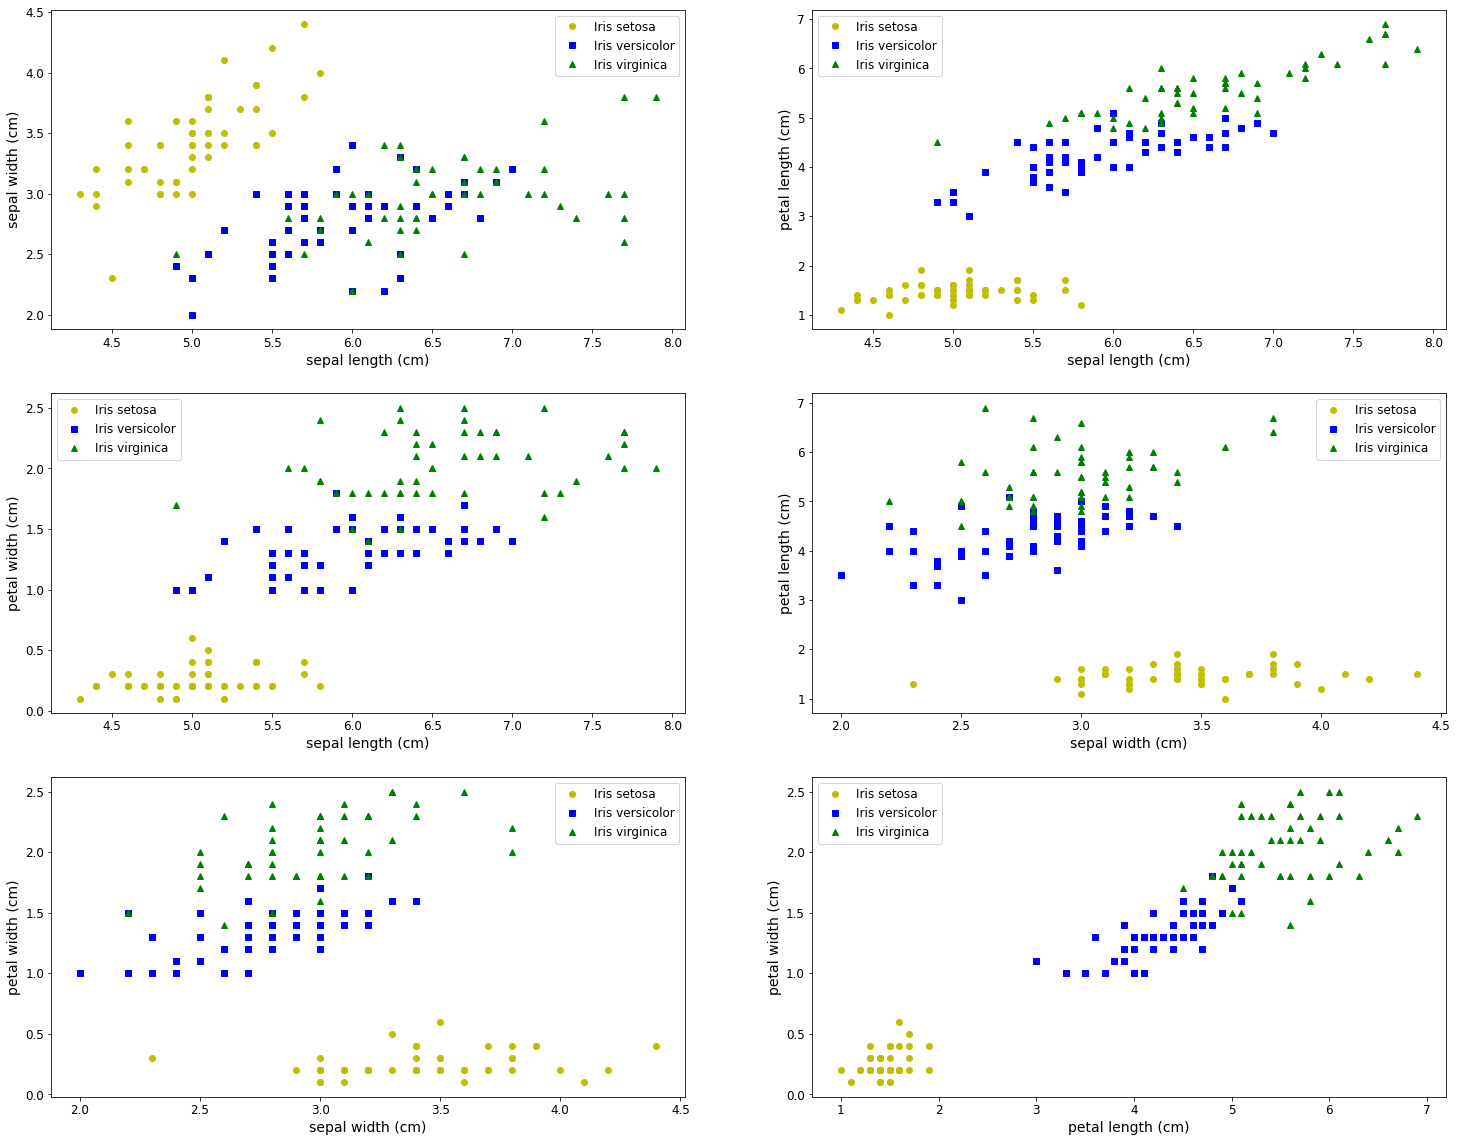

In [177]:
plt.figure(figsize=(25, 20))
count = 1
for i in range (3): 
    for j in range (1,4):
        if i <j : 
            plt.subplot(3,2, count)
            
            plt.plot(X[y==0, i], X[y==0, j], "yo", label="Iris setosa") 
            plt.plot(X[y==1, i], X[y==1, j], "bs", label="Iris versicolor")
            plt.plot(X[y==2, i], X[y==2, j], "g^", label="Iris virginica")
            
            plt.xlabel(data.feature_names[i], fontsize=14)
            plt.ylabel(data.feature_names[j], fontsize=14)
            plt.legend(fontsize=12)
            
            count=count+1
           

Na powyższych wykresach przedstawione zostały kolejno zależności:
- sepal width i sepal length
- petal length i sepal length
- petal width i sepal length
- petal length i sepal length
- petal width i sepal width
- petal width i petal length

#### 2. Dla których par cech grupowanie wygląda na najłatwiejsze, a dla których na najtrudniejsze?

Grupowanie stosowane jest zazwyczaj w zbiorach, w których nie ma etykiet. W tym wypadku jednak etykiety są (gatunki).

Grupowanie najłatwiejsze to takie, w którym jasno zdeterminowany jest klaster. W przypadku zbioru Iris gatunki nie powinny być ze sobą "wymieszane", ale jasno od siebie odseparowane. 

Najłatwiejsze grupowanie wydaje się być dla cech  *petal length* oraz *petal width*, czyli ostatni wykres (kolumny 3 i 4 z ramki danych). 
Na wykresie widoczne jest jasne oddzielenie gatunku Iris Setosa (żółte punkty), którego próbki nie występują w obszarze innych gatunków.
Grupy Iris Versicolor (granatowe) oraz Iris Virgnica (zielone) są dość blisko siebie. Gdy płatek Kosaćca posiada długość 5-5,5 cm i szerokość 1,5-2,0 cm to może być to zarówno gatunek Versicolor jak i Virgnica. Na tym wykresie widoczne jest kilka punktów w tym obszarze. Jest to nieznaczna część całego gatunki. 

Grupowanie najtrudniejsze to takie, w którym grupy nie są jasno od siebie odseparowane. 

Wydaje się, że najbardziej "wymieszane" punkty między grupami znajdują się na wykresie cech *sepal length* oraz *sepal width*, czyli pierwszy wykres (kolumny 1 i 2 z ramki danych).
Ponownie grupa Iris Setosa (żółte punkty) znajduje się w jednym obszarze (poza jednym punktem, który jest dość mocno odseparowany). Jednak grupa ta nie jest aż tak zwarta jak w przypadku cech *petal length* oraz *petal width*. 

Grupy Iris Versicolor (granatowe) oraz Iris Virgnica (zielone) są całkowicie ze sobą wymieszane, nie da się wyznaczyć granicy pomiędzy grupami. 

#### 3. Wykonaj grupowanie dla każdej pary cech za pomocą metody KMeans z modułu Scikit Learn 

Wykonane wraz z zadaniem 4

#### 4. Wylicz, ile punktów w każdym uzyskanym podziale znalazło się w „niewłaściwym” klastrze
(aby ułatwić odpowiednie etykietowanie klastrów można skorzystać z mapowania
opisanego w sekcji „Introduction – Classification vs Clustering” notatnika [1]).

In [178]:
from sklearn.cluster import KMeans

In [353]:
import numpy as np
from scipy import stats
k = 3
`
for i in range (3):
    for j in range (1,4):
        if i <j : 
            kmeans = KMeans(n_clusters=k, random_state=42)
            y_pred = kmeans.fit_predict(X[:,[i,j]])
            
            
            mapping = {}
            for class_id in np.unique(y):
                mode, _ = stats.mode(y_pred[y==class_id], keepdims = True)
                mapping[mode[0]] = class_id
                
            y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

            incorrect = sum(y!=y_pred)
                
            print("Dla pary cech", data.feature_names[i], "oraz", data.feature_names[j], "liczba niewłaściwie przypisanych próbek wynosi:" , incorrect, '.')

Dla pary cech sepal length (cm) oraz sepal width (cm) liczba niewłaściwie przypisanych próbek wynosi: 27 .
Dla pary cech sepal length (cm) oraz petal length (cm) liczba niewłaściwie przypisanych próbek wynosi: 18 .
Dla pary cech sepal length (cm) oraz petal width (cm) liczba niewłaściwie przypisanych próbek wynosi: 28 .
Dla pary cech sepal width (cm) oraz petal length (cm) liczba niewłaściwie przypisanych próbek wynosi: 11 .
Dla pary cech sepal width (cm) oraz petal width (cm) liczba niewłaściwie przypisanych próbek wynosi: 11 .
Dla pary cech petal length (cm) oraz petal width (cm) liczba niewłaściwie przypisanych próbek wynosi: 6 .


#### 5. Czy liczby te odpowiadają przewidywaniom z punktu 2?


Prawidłowo została wskazana para *petal length* oraz *petal width* jako para cech dla której grupowanie wydawało się najłatwiejsze - ma ono zaledwie 6 błędnie przypisanych grup. 

Dla cech *sepal length* oraz *sepal width* istnieje  bardzo dużo punktów niewłaściwych, więc prawidłowe były przypuszczenia w zadaniu drugim. 

Zaskoczeniem są cechy: *sepal length* oraz *petal width*, w wyniku których wyszło najwięcej takich przypisanych nieprawdiłowych, co jednak nie udało się odczytać z wykresu. 

#### 6. Czy wyniki różnią się między sobą przy kolejnych wykonaniach algorytmu? Jeżeli tak, to jak można zapewnić powtarzalność eksperymentów

Wyniki mogą różnić się między sobą po wykonaniu algorytmu kilkukrotnie

In [180]:
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X[:,[0,3]])
            
            
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id], keepdims = True)
    mapping[mode[0]] = class_id
                
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

incorrect = sum(y!=y_pred)
                
print("Dla pary cech", data.feature_names[0], "oraz", data.feature_names[3], "liczba niewłaściwie przypisanych wynosi:" , incorrect, '.')

Dla pary cech sepal length (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 28 .


Dla pary cech *sepal length* oraz *petal width* wartości prezentowały się następująco: 

- 28, 26, 28, 28, 26, 28, 26, 26

Powtarzalność eksperymentów można zapewnić dzięki parametrowi *random_state* [ kmeans = KMeans(n_clusters=k, random_state=42) ], który wywołuje te same losowe, ale jednak stałe liczby dla algorytmu ( algorytm wywołany z random_state 10krotnie bierze najlepszy wyniki z tych wywołań)

 #### 7. Utwórz 12 wykresów za pomocą matplotlib.pyplot.subplot w następujący sposób:
- wykresy powinny był ułożone parami w 6 wierszach,
- każdy wiersz reprezentuje daną parę cech, 
- kolumna pierwsza to wykresy z punktu 1,
- kolumna druga zawiera wykresy analogiczne do kolumny pierwszej, jednak zamiast gatunków różnymi kolorami i symbolami oznaczone są klastry, do których przydzielił punkty algorytm KMeans.

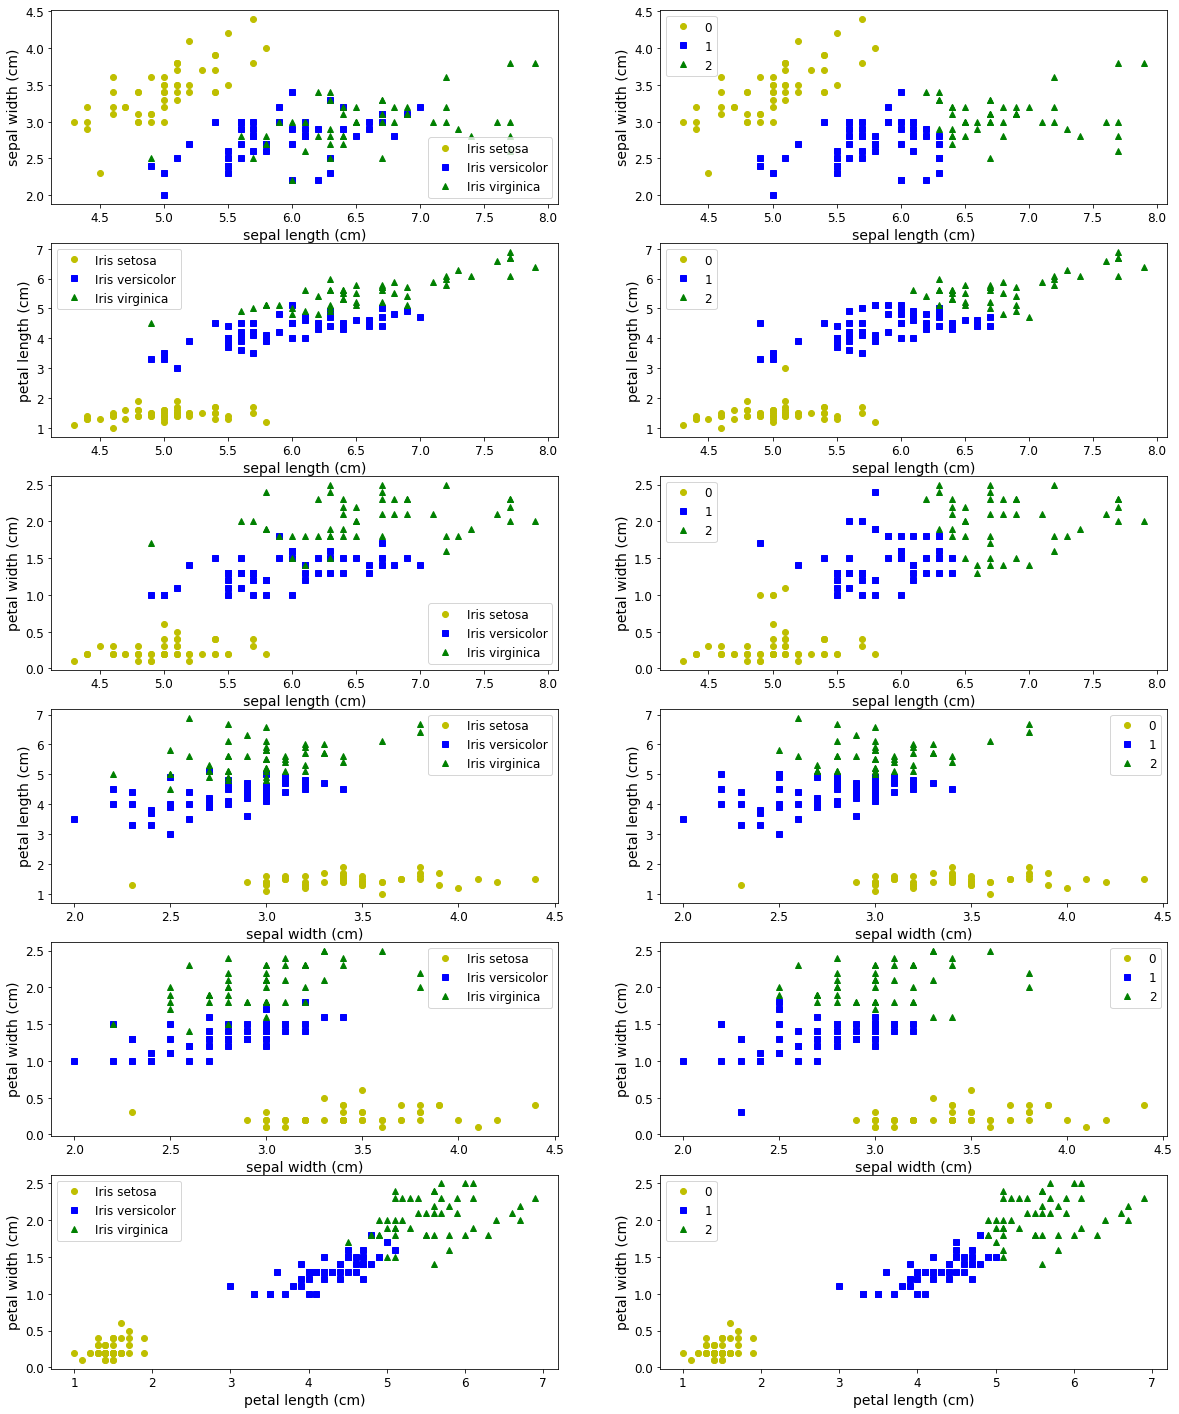

In [181]:
plt.figure(figsize=(20, 25))
count = 1
for i in range (3):
    for j in range (1,4):
        if i <j :
            plt.subplot(6,2, count)
            
            plt.plot(X[y==0, i], X[y==0, j], "yo", label="Iris setosa")
            plt.plot(X[y==1, i], X[y==1, j], "bs", label="Iris versicolor")
            plt.plot(X[y==2, i], X[y==2, j], "g^", label="Iris virginica")
            
            plt.xlabel(data.feature_names[i], fontsize=14)
            plt.ylabel(data.feature_names[j], fontsize=14)
            plt.legend(fontsize=12)
            
            count=count+1
            
            
            kmeans = KMeans(n_clusters=k, random_state=42)
            y_pred = kmeans.fit_predict(X[:,[i,j]])
            
            
            mapping = {}
            for class_id in np.unique(y):
                mode, _ = stats.mode(y_pred[y==class_id], keepdims = True)
                mapping[mode[0]] = class_id
                
            y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
            
            plt.subplot(6,2, count)
            plt.plot(X[y_pred==0, i], X[y_pred==0, j], "yo", label="0")
            plt.plot(X[y_pred==1, i], X[y_pred==1, j], "bs", label="1")
            plt.plot(X[y_pred==2, i], X[y_pred==2, j], "g^", label="2")
            plt.xlabel(data.feature_names[i], fontsize=14)
            plt.ylabel(data.feature_names[j], fontsize=14)
            plt.legend(fontsize=12)
                
            count=count+1

#### 8. Sprawdź, czy w przypadku wykorzystania wszystkich cech do grupowania, liczba punktów przypisanych do „właściwego” klastra będzie większa niż dla którejkolwiek pary cech.

In [182]:
#klastrowanie z uwzględnieniem wszystkich cech 
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X) 
                       
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id], keepdims = True)
    mapping[mode[0]] = class_id
                
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

correct_all = sum(y==y_pred)
                
print(correct_all)

134


In [183]:
#klastrowanie dla kombinacji dwóch cech 
correct_min = 0
correct_max = 0

for i in range (3): 
    for j in range (1,4):
        if i <j : 
            kmeans = KMeans(n_clusters=k, random_state=42)
            y_pred = kmeans.fit_predict(X[:,[i,j]])
            
            
            mapping = {}
            for class_id in np.unique(y):
                mode, _ = stats.mode(y_pred[y==class_id], keepdims = True)
                mapping[mode[0]] = class_id
                
            y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

            correct = sum(y==y_pred)
            if correct_max < correct:
                correct_max = correct

# sprawdzenie czy więcej właściwych dla klastrowania wszystkich cech czy dla klastrowania dwóch cech
if correct_all > correct_max:
    print ("Więcej właściwych jest dla grupowania wszystkich cech")
else:
    print ("Więcej właściwe przypisanych próbek jest gdy grupowanie odbywa się zaledwie dla dwóch cech. ")
    print("Liczba prawidłowo zaklasyfikowanych dla grupowania dla wszystkich cech wynosi:", correct_all, "/150", ", natomiast największa wartość prawidłowo zaklasyfikowanych dla dwóch cech to:", correct_max, "/150.")

Więcej właściwe przypisanych próbek jest gdy grupowanie odbywa się zaledwie dla dwóch cech. 
Liczba prawidłowo zaklasyfikowanych dla grupowania dla wszystkich cech wynosi: 134 /150 , natomiast największa wartość prawidłowo zaklasyfikowanych dla dwóch cech to: 144 /150.


Można by więc przypuszczać, że niektóre z cech zaburzają prawidłowość przypisania do grup w algorytmie K-Means

#### 9. Korzystając z kodu w sekcji „Decision Boundaries” notatnika [1], stwórz diagram Woronoja dla „najlepszej” pary cech.

Najlepsza para cech (z największą ilością prawidłowo przyporządkowanych punktów) to petal width oraz petal length

In [184]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [185]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit(X[:,[2,3]])

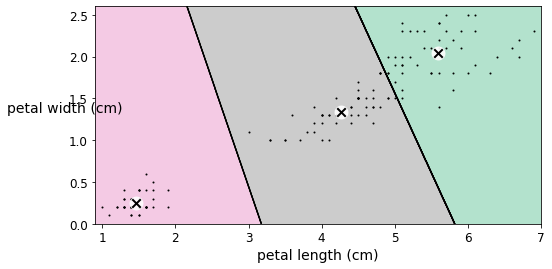

In [186]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X[:,[2,3]])
plt.xlabel(data.feature_names[2], fontsize=14)
plt.ylabel(data.feature_names[3], fontsize=14)
plt.show()


Na powyższym wykresie widocznie został oddzielony klaster po lewej stronie (różowa sekcja). Wszystkie jego punkty są dość mocno skupione. 

Jeśli chodzi o dwa pozostałe klastry to widać, że kilka punktów znajduje się blisko granicy (linia pomiędzy szarą i zieloną sekcją) i właśnie niektóre z tych punktów mogły zostac zaklasyfikowane nieprawidłowo.

#### 10. Korzystając z kodu w sekcji „Decision Boundaries” notatnika [1], stwórz diagram Woronoja dla „najgorszej” pary cech.

Najgorsza para cech (z najmniejszą ilością prawidłowo przyporządkowanych punktów) to sepal length oraz petal width.

In [390]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit(X[:,[0,3]])

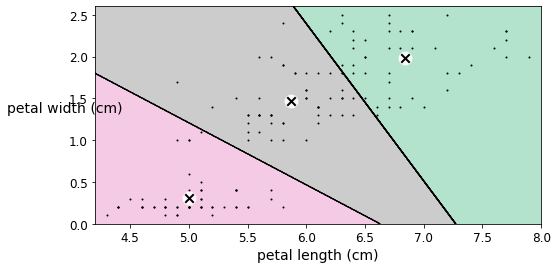

In [392]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X[:,[0,3]])
plt.xlabel(data.feature_names[2], fontsize=14)
plt.ylabel(data.feature_names[3], fontsize=14)
plt.show()

W przypadku tego wykresu więcej punktów znalazło się przy granicy dzielącej sekcję różową oraz sekcję szarą. Punkty nie są one tak mocno od siebie odseparowane.  

Ponadto, więcej punktów znajduje się przy granicy granicy sekcji szarej i zielonej. A nawet niektóre z nich wydają się leżeć bezpośrednio na niej, w związku z czym istnieje prawdopodobieństwo, że ich klasyfiakcja jest błędna. 

Klastry są bardziej rozproszone. 

#### 11. Korzystając z kodu w sekcji „The K-Means Algorithm” notatnika [1], dla „najlepszej” pary cech wykonaj wykres ilustrujący stan algorytmu k-średnich w pierwszych kilku iteracjach.

In [189]:
import warnings

warnings.filterwarnings("ignore")

kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X[:,[2,3]])
kmeans_iter2.fit(X[:,[2,3]])
kmeans_iter3.fit(X[:,[2,3]])

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=3, n_init=1,
       random_state=0)

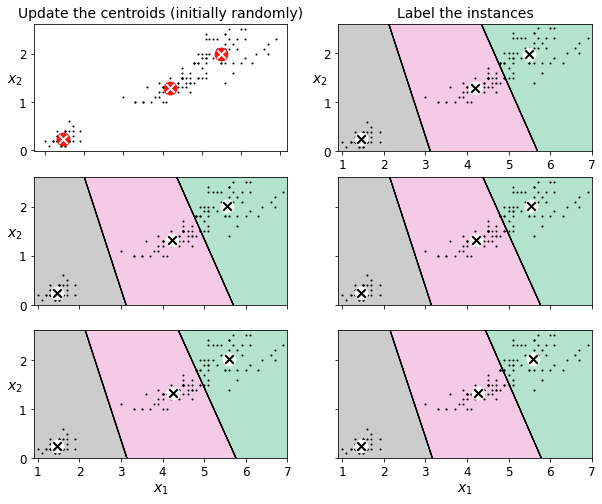

In [190]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X[:,[2,3]])
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X[:,[2,3]])
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X[:,[2,3]], show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X[:,[2,3]], show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X[:,[2,3]], show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X[:,[2,3]], show_ylabels=False)


plt.show()



Na kolejnych wykresach widać, że granica pomiędzy klastrem drugim i trzecim (różowym i zielonym) przesuneła się odrobinę w prawo. 

#### 12. Dla metody KMeans znajdź w dokumentacji Scikit-Learn wzór na inercję, której wartość jest dostępna jako pole inertia_ obiektu KMeans. Inercja stanowi miarę jakości podziału na klastry. Czy miara ta jest podobna lub identyczna z którąś z miar jakości  podziału omawianych na wykładzie? 

Inercja - Suma kwadratów odległości próbek do ich najbliższego środka klastra  (ważona przez wagi próbek, jeśli zostały podane).
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [191]:
kmeans.inertia_

32.72652615902616

Inercja jest podobną miarą do odchylenia **(wc(C))** wewnątrzklastrowego. Miarę odchylenia wewnątrzklastrowego definiujemy jako sumę odległości obiektów od środków klastrów, do których obiekty należą

#### 13. Czy „najlepszy” i „najgorszy” (ze względu na wielkość inercji) podział występuje dla tych samych par cech, co w pkt. 4?

Zakładając, że ilość przypisanych próbek do jednego klastra jest podobna można uznać, że im mniejsza wartość inercji tym klastry są bardziej bardziej zbite, a więc podział jest lepszy.

In [192]:
for i in range (3):
    for j in range (1,4):
        if i <j : 
            kmeans = KMeans(n_clusters=k, random_state=42)
            y_pred = kmeans.fit_predict(X[:,[i,j]])
            
            
            mapping = {}
            for class_id in np.unique(y):
                mode, _ = stats.mode(y_pred[y==class_id], keepdims = True)
                mapping[mode[0]] = class_id
                
            y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

            incorrect = sum(y!=y_pred)
                
            print("\nDla pary cech", data.feature_names[i], "oraz", data.feature_names[j], "liczba niewłaściwie przypisanych wynosi:" , incorrect, ".")
            print("Wartość inercji dla tej pary wynosi: ", round(kmeans.inertia_,2) )


Dla pary cech sepal length (cm) oraz sepal width (cm) liczba niewłaściwie przypisanych wynosi: 27 .
Wartość inercji dla tej pary wynosi:  37.05

Dla pary cech sepal length (cm) oraz petal length (cm) liczba niewłaściwie przypisanych wynosi: 18 .
Wartość inercji dla tej pary wynosi:  53.81

Dla pary cech sepal length (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 28 .
Wartość inercji dla tej pary wynosi:  32.73

Dla pary cech sepal width (cm) oraz petal length (cm) liczba niewłaściwie przypisanych wynosi: 11 .
Wartość inercji dla tej pary wynosi:  40.74

Dla pary cech sepal width (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 11 .
Wartość inercji dla tej pary wynosi:  20.6

Dla pary cech petal length (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 6 .
Wartość inercji dla tej pary wynosi:  31.37


Najlepszy podział ze względu na inercję występuje dla cech sepal width (cm) oraz petal width (cm) - są to inne cechy niż w przypadku zadania 4. 

Najgorszy podział ze względu na inercję występuje dla cech sepal length (cm) oraz petal length  - są to inne cechy niż w przypadku zadania 4. 

#### 14. Utwórz wykres inercji w zależności od liczby klastrów, np., od 1 do 10 klastrów dla dowolnej pary cech. Można tutaj wykorzystać kod z sekcji „Finding the optimal number of clusters” notatnika [1]. Czy „łokieć” występuje na wykresie dla liczby klastrów równej liczbie gatunków kwiatów?

In [354]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X[:,[2,3]])
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

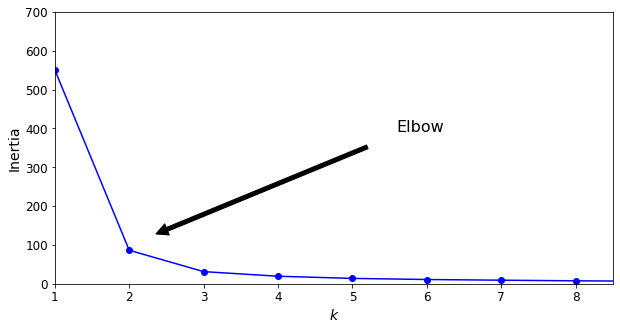

In [370]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, 100),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )


plt.axis([1, 8.5, 0, 700])
plt.show()

Łokieć występuje dla dwóch klastrów. Jest to liczba mniejsza od liczby gatunków zdefiniowanych w rzeczywistości.

#### 15. Utwórz wykres wyniku profilu analogicznie do punktu 14. Czy najwyższy wynik profilu występuje na wykresie dla liczby klastrów równej liczbie gatunków kwiatów

In [360]:
from sklearn.metrics import silhouette_score

silhouette_score(X[:,[2,3]], kmeans.labels_)

0.6604800083974887

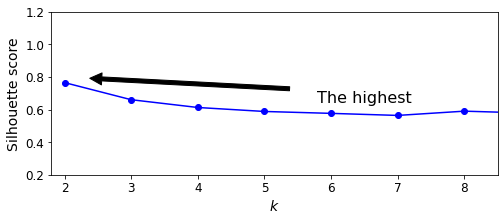

In [369]:
silhouette_scores = [silhouette_score(X[:,[2,3]], model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('The highest',
             xy=(2, 0.8),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.axis([1.8, 8.5, 0.2, 1.2])

plt.show()

Najwyższy wynik profilu występuje dla dwóch klastrów. Jest to liczba mniejsza od liczby gatunków zdefiniowanych w rzeczywistości.

#### 16. Dla najlepszej liczby klastrów znalezionej w punkcie 14, w punkcie 15 oraz dla liczby klastrów równej liczbie gatunków kwiatów sporządź wykresy profilu.

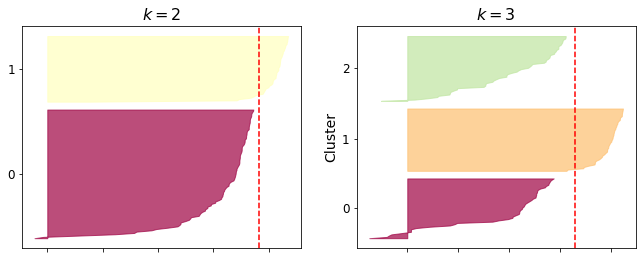

In [371]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2, 3):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show()

#### 17. Dla algorytmu DBSCAN oraz dowolnego innego algorytmu grupowania Scikit-Learn (https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) powtórz kroki 3, 4 i 12. Czy uzyskane wyniki były lepsze, niż te osiągnięte przez KMeans?

Algorytm DBSCAN

In [198]:
from sklearn.cluster import DBSCAN


Dla pary cech sepal length (cm) oraz sepal width (cm) liczba niewłaściwie przypisanych wynosi: 81 .

Dla pary cech sepal length (cm) oraz petal length (cm) liczba niewłaściwie przypisanych wynosi: 100 .

Dla pary cech sepal length (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 70 .

Dla pary cech sepal width (cm) oraz petal length (cm) liczba niewłaściwie przypisanych wynosi: 78 .

Dla pary cech sepal width (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 52 .

Dla pary cech petal length (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 50 .


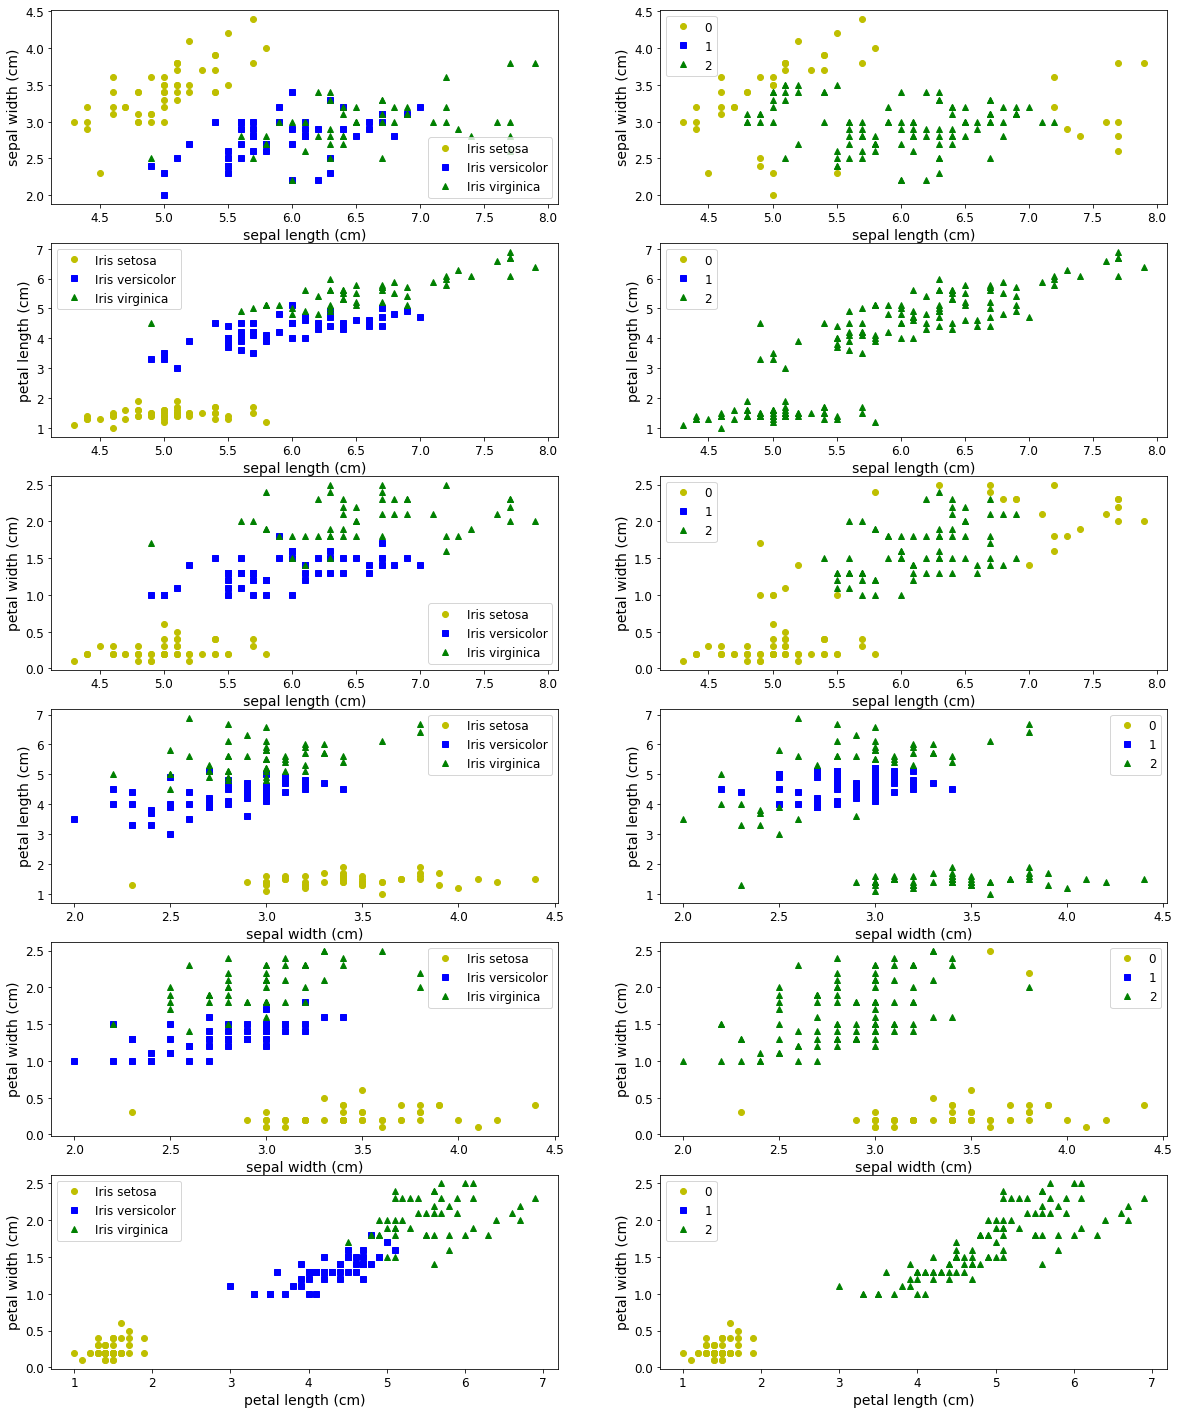

In [383]:
plt.figure(figsize=(20, 25))
count = 1
for i in range (3):
    for j in range (1,4):
        if i <j :
            plt.subplot(6,2, count)
            plt.plot(X[y==0, i], X[y==0, j], "yo", label="Iris setosa")
            plt.plot(X[y==1, i], X[y==1, j], "bs", label="Iris versicolor")
            plt.plot(X[y==2, i], X[y==2, j], "g^", label="Iris virginica")
            
            plt.xlabel(data.feature_names[i], fontsize=14)
            plt.ylabel(data.feature_names[j], fontsize=14)
            plt.legend(fontsize=12)
            
            count=count+1
            
            
            dbscan = DBSCAN(eps=0.62, min_samples=50)
            y_pred = dbscan.fit_predict(X[:,[i,j]])
            
            
            mapping = {}
            for class_id in np.unique(y):
                mode, _ = stats.mode(y_pred[y==class_id], keepdims = True)
                mapping[mode[0]] = class_id
                
            try:
                y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
            except KeyError:
                y_pred = np.arange(10)
            
            
            plt.subplot(6,2, count)
            plt.plot(X[y_pred==0, i], X[y_pred==0, j], "yo", label="0")
            plt.plot(X[y_pred==1, i], X[y_pred==1, j], "bs", label="1")
            plt.plot(X[y_pred==2, i], X[y_pred==2, j], "g^", label="2")
            plt.xlabel(data.feature_names[i], fontsize=14)
            plt.ylabel(data.feature_names[j], fontsize=14)
            plt.legend(fontsize=12)
                
            count=count+1
            
            incorrect = sum(y!=y_pred)
                
            print("\nDla pary cech", data.feature_names[i], "oraz", data.feature_names[j], "liczba niewłaściwie przypisanych wynosi:" , incorrect, ".")

In [394]:
dbscan.inertia_

AttributeError: 'DBSCAN' object has no attribute 'inertia_'

Inercja jest miarą stosowaną raczej dla algorytmów, które tworzą klastry sferyczne. 

Algorytm DBSCAN jest algorytmem gęstościowym.

Klastry powstające w wyniku działania algorytmu DBSCAN mogą mieć dowolne kształty i nie są oparte na jednym, środkowym punkcie. Dlatego też wyliczanie ich 'zwartości' nie ma sensu.  

Wartości, które są w Pythonie najważniejsze do zdefiniowania dla tego algorytmu to:
- eps - promień sąsiedztwa, czyli minimalna odległość dzieląca dwie próbki konieczna, by zostały one uznane za sąsiadów
- min_samples -  minimalna liczba obserwacji potrzebna by wybrana obserwacja została uznana za punkt centralny danej grupy

Wybrane zostały takie parametry, które pozwoliły na podzielenie całe zbioru redukując liczbę punktów niewłaściwie przypisanych. Starano się wybrać takie wartości dla eps oraz min_samples, by algorytm podzielil cały zbiór na max 3 grupy. Było to niezbędne ponieważ tylko dla 3 grup było możliwe wykonanie mapowania z gatunkami i sprawdzenie prawidłowości przypisania próbek (gdy wybrano takie parametry, że grup podziału tworzyło się więcej to niemożliwe bylo zmapowanie ich do nazw grup gatunków, a tym samym sprawdzenie czy próbka została prawidłowo przypisana - wyświetlał się KeyError).

Algorytm ten nie umożliwia definiowania liczby powstałych grup, jednak można nią manipulować poprzez zmianę parametrów modelu. 

W mojej ocenie algorytm KMeans sprawdził się lepiej niż DBSCAN - co widać jasno po dużej liczbie niewłaściwie przypisanych próbek w przypadku DBSCAN. Zdarzały się sytuacje, że niektóre gatunki w ogóle się nie pojawiały. Możliwe jednak, że przez brak doświadczenia w działaniu algorytmu DBSCAN zostały źle dobrane parametry dla algorytmu. 

#### Algorytm BIRCH

In [282]:
from sklearn.cluster import Birch


Dla pary cech sepal length (cm) oraz sepal width (cm) liczba niewłaściwie przypisanych wynosi: 128 .

Dla pary cech sepal length (cm) oraz petal length (cm) liczba niewłaściwie przypisanych wynosi: 20 .

Dla pary cech sepal length (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 20 .

Dla pary cech sepal width (cm) oraz petal length (cm) liczba niewłaściwie przypisanych wynosi: 20 .

Dla pary cech sepal width (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 12 .

Dla pary cech petal length (cm) oraz petal width (cm) liczba niewłaściwie przypisanych wynosi: 16 .


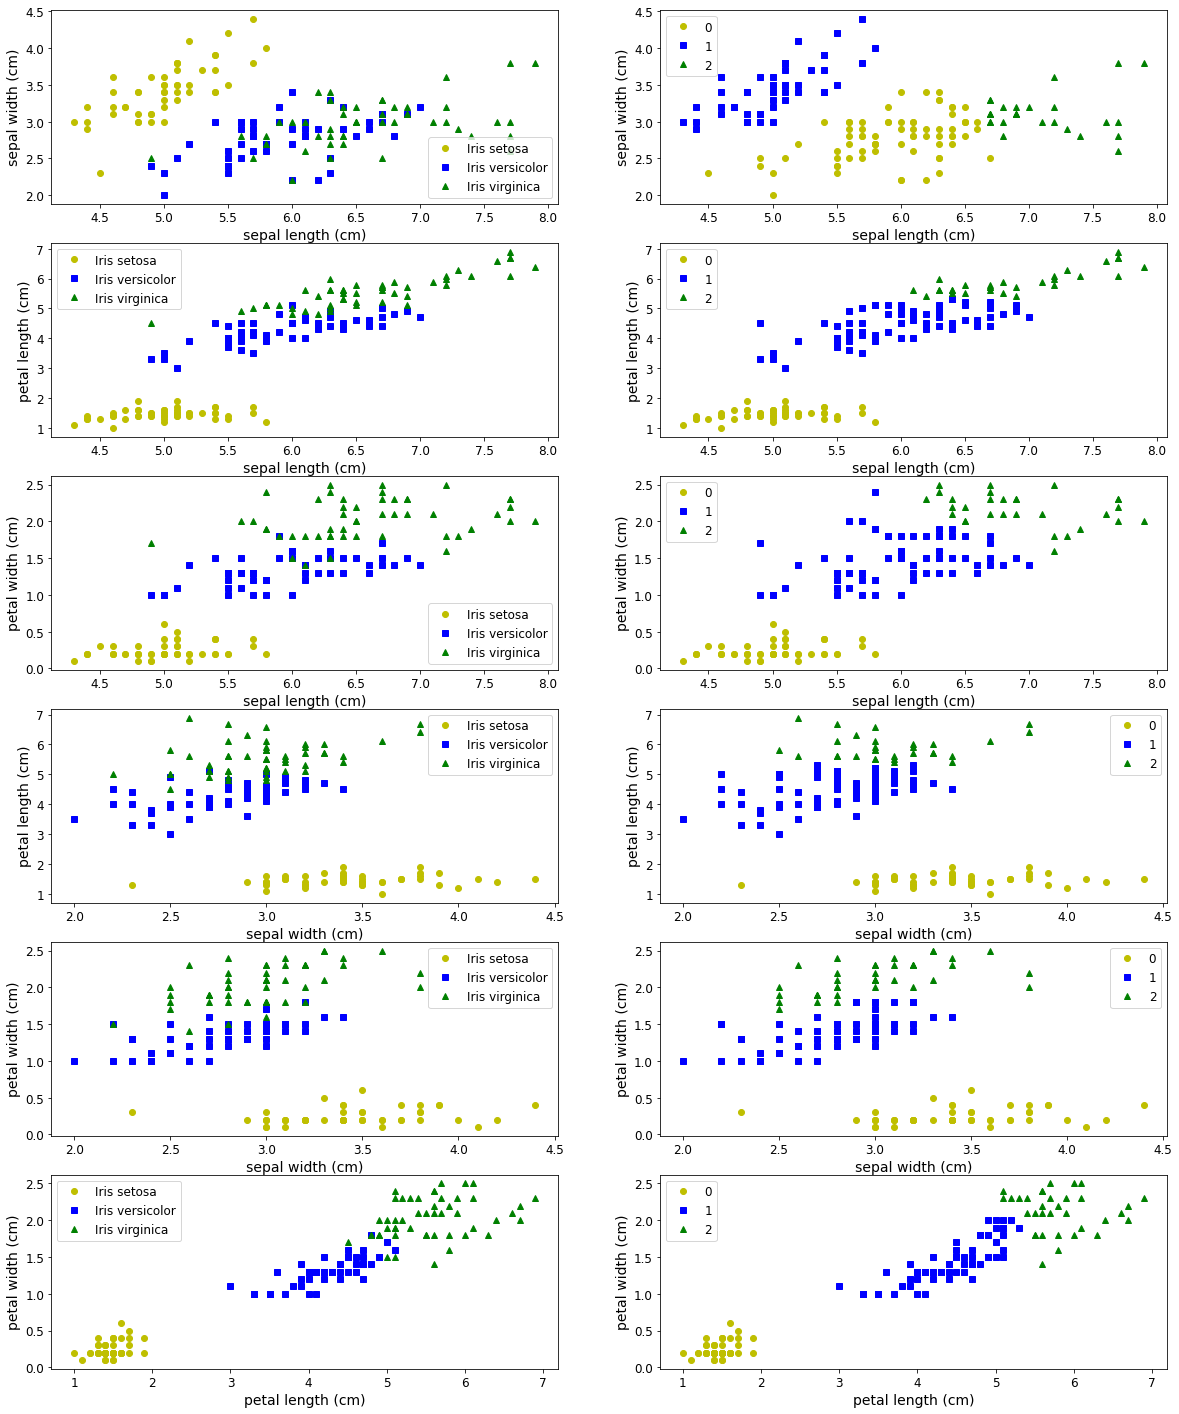

In [386]:
plt.figure(figsize=(20, 25))
count = 1
for i in range (3):
    for j in range (1,4):
        if i <j :
            plt.subplot(6,2, count)
            plt.plot(X[y==0, i], X[y==0, j], "yo", label="Iris setosa")
            plt.plot(X[y==1, i], X[y==1, j], "bs", label="Iris versicolor")
            plt.plot(X[y==2, i], X[y==2, j], "g^", label="Iris virginica")
            
            plt.xlabel(data.feature_names[i], fontsize=14)
            plt.ylabel(data.feature_names[j], fontsize=14)
            plt.legend(fontsize=12)
            
            count=count+1
            
            
            birch = Birch(threshold=0.01, n_clusters=3)
            y_pred = birch.fit_predict(X[:,[i,j]])
            
            
            mapping = {}
            for class_id in np.unique(y):
                mode, _ = stats.mode(y_pred[y==class_id], keepdims = True)
                mapping[mode[0]] = class_id
                
            try:
                y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
            except KeyError:
                y_pred = y_pred 
            
            
            plt.subplot(6,2, count)
            plt.plot(X[y_pred==0, i], X[y_pred==0, j], "yo", label="0")
            plt.plot(X[y_pred==1, i], X[y_pred==1, j], "bs", label="1")
            plt.plot(X[y_pred==2, i], X[y_pred==2, j], "g^", label="2")
            plt.xlabel(data.feature_names[i], fontsize=14)
            plt.ylabel(data.feature_names[j], fontsize=14)
            plt.legend(fontsize=12)
                
            count=count+1
            
            incorrect = sum(y!=y_pred)
                
            print("\nDla pary cech", data.feature_names[i], "oraz", data.feature_names[j], "liczba niewłaściwie przypisanych wynosi:" , incorrect, ".")

In [393]:
birch.inertia_

AttributeError: 'Birch' object has no attribute 'inertia_'

Algorytm Birch nie posiada parametru inercji

Z jakiegoś nieznanego powodu niemożliwe jest wykonanie mapowania dla pierwszego wykresu dla działania algorytmu (pierwszy wykres w drugiej kolumnie) - na wykresie widoczne są nieprawidłowe oznaczenia. W przypadku tego wykresu próbi w większości:
- granatowe powinny być oznaczone kolorem żółtym
- żółte powinny być oznaczone kolorem granatowym

Algorytm BIRCH jest algorytmem hierarchicznym. 

Buduje on drzewo o nazwie Clustering Feature Tree (CFT) dla podanych danych. Dane są zasadniczo skompresowane ze stratami do zestawu węzłów funkcji klastrowania (węzłów CF). Węzły CF mają pewną liczbę podklastrów zwanych podklastrami funkcji klastrowania (podklastrami CF), a te podklastry CF zlokalizowane w nieterminalnych węzłach CF mogą mieć węzły CF jako dzieci.

Wartości, które są najważniejsze do zdefiniowania w Pythonie dla tego algorytmu to :
- treshold - promień podklastra uzyskany przez połączenie nowej próbki i najbliższego podklastra powinien być mniejszy niż próg. W przeciwnym razie zostanie uruchomiony nowy podklaster. Ustawienie tej wartości na bardzo niską sprzyja rozdzielaniu i odwrotnie.
- n_clusters - liczba klastrów po ostatnim etapie grupowania, w którym podgrupy z liści są traktowane jako nowe próbki.


Wartości niewłaściwie przypisanych są większe niż w przypadku algorytmu K-Means, jednak wyniki są lepsze niż w przypadku działania.
Dla pary cech, z która algorytm KMeans poradził sobie najgorzej, czyli sepal length (cm) oraz petal length (cm), algorytm BIRCH poradził sobie lepiej - mniejsza liczba niewłaściwie przypisanych (dla Kmeans- 28, dla Birch - 20). 